# Image processing features

## Image loading / display

The `load_image` is the main loading method, leveraging `tf.image.decode_image` or `PIL.Image.open`, depending on the keras backend. This function is compatible with the `tensorflow graph` mode (no matter the backend), and returns either a `tf.Tensor`, either a `np.ndarray`, either a `keras Tensor` object (with dtype `dtype`, default to `float32`). Note that the `resize_image` is always performed with `keras` function, meaning that the return value is a `keras backend Tensor` when reshaping the image ;)

The `plot / plot_multiple` functions can display images, thanks to `plt.imshow`. By default, the `plot_type = 'imshow'` is forced for 3-D array, but it may be useful to set it explicitely when plotting multiple images (with `plot_multiple`).

An alternative to `plot` is the `display_image` function, that leverages `IPython.display.Image`. Its major benefit is that it handles multiple types of images (e.g., animations / videos / files). 

Image shape : (512, 512, 3) with type EagerTensor


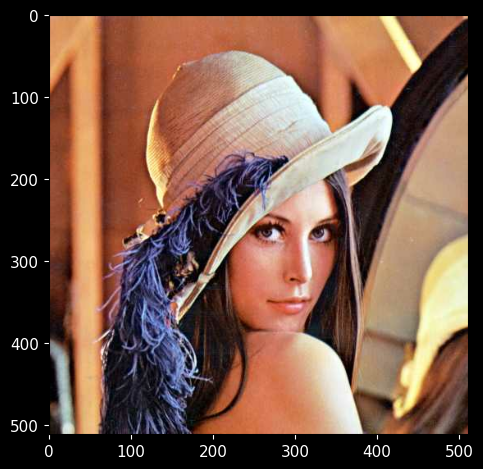

In [2]:
import os

from utils import plot, plot_multiple
from utils.image import load_image, display_image
from utils.image.bounding_box import *

path = os.path.join('example_data', 'images', 'lena.jpg')
# Load the image as a tf.Tensor
image = load_image(path)
print("Image shape : {} with type {}".format(image.shape, image.__class__.__name__))
# Plots the image (the `plot_type = 'imshow'` is optional : it automatically uses it for 3-D arrays)
_ = plot(image)

## Bounding boxes

The `shape` argument is typically a `bounding_box.Shape` enum item, but it can also be passed as a string (thansk to the `utils.get_enum_item` function).

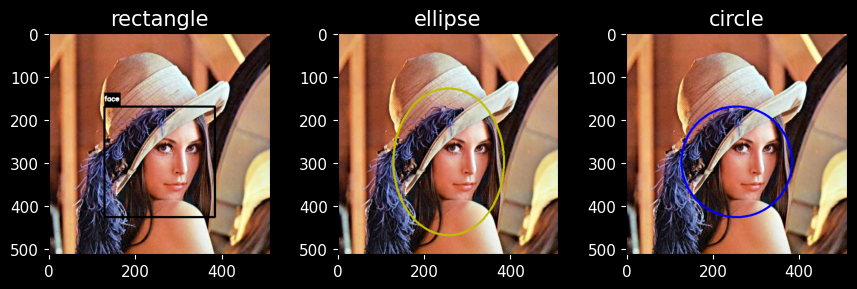

In [6]:
box = [len(image) // 4, len(image) // 3, len(image) // 2, len(image) // 2]

rectangle = draw_boxes(image, box, labels = ['face'], color = 'black', source = 'xywh')
ellipse   = draw_boxes(image, box, shape = 'ellipse', color = 'y', source = 'xywh')
circle    = draw_boxes(image, box, shape = 'circle', source = 'xywh')

plot_multiple(
    rectangle = rectangle, ellipse = ellipse, circle = circle,
    plot_type = 'imshow', horizontal = True, size = 3, ncols = 3
)

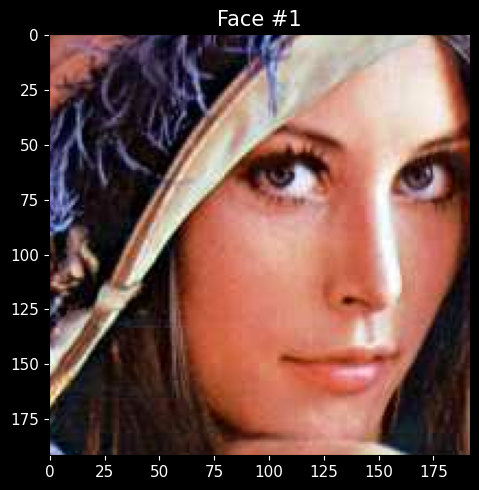

In [8]:
show_boxes(path, box, dezoom_factor = 0.75, labels = ['Face'], source = 'xywh')